In [1]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,RepeatedStratifiedKFold, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, roc_auc_score
from sklearn.preprocessing import MinMaxScaler, LabelEncoder 

In [2]:
data = pd.read_csv('DS3_C6_S2_Classification_BankChurn_Data_Project.csv')
data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


In [5]:
data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# to check null values
data.isnull().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
# to check noise in object type data
object_columns = list(data.select_dtypes(include = 'object').columns)
for cols in object_columns:
    print(data[cols].value_counts())

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
France     5001
Germany    2502
Spain      2469
france        7
espanio       6
fra           6
ger           4
spain         2
germany       1
gernamy       1
GERMANY       1
Name: Geography, dtype: int64
Male      5457
Female    4543
Name: Gender, dtype: int64


In [8]:
# Clearing Noise.
data['Geography'] = data['Geography'].apply(lambda x: x.title())
data['Geography'].replace('Espanio', 'Spain', inplace= True)
data['Geography'].replace('Fra','France', inplace= True)
data['Geography'].replace(['Gernamy','Ger'],'Germany', inplace = True)
data['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
# converting object columns into categorical to encode
data1 = data.copy()
object_columns.remove('Surname')
data1[object_columns] = data1[object_columns].astype('category')
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CustomerId       10000 non-null  int64   
 1   Surname          10000 non-null  object  
 2   CreditScore      10000 non-null  int64   
 3   Geography        10000 non-null  category
 4   Gender           10000 non-null  category
 5   Age              10000 non-null  int64   
 6   Tenure           10000 non-null  int64   
 7   Balance          10000 non-null  float64 
 8   NumOfProducts    10000 non-null  int64   
 9   HasCrCard        10000 non-null  int64   
 10  IsActiveMember   10000 non-null  int64   
 11  EstimatedSalary  10000 non-null  float64 
 12  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(8), object(1)
memory usage: 879.3+ KB


In [10]:
# converting categorical data into numerical
data1[object_columns] = data1[object_columns].apply(LabelEncoder().fit_transform)
data1.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### Explaratory Data Analysis

15


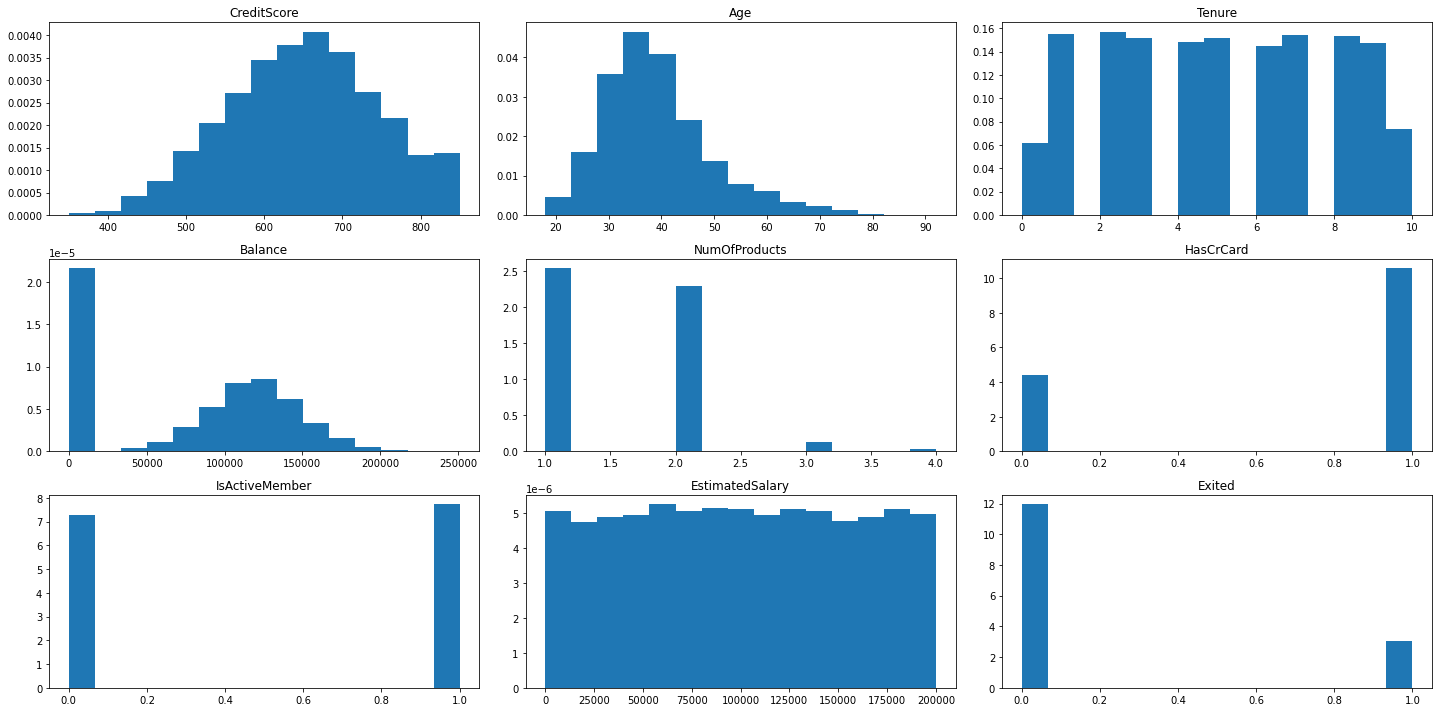

In [11]:
# Univariate Analysis on all numerical columns
new_df = data.select_dtypes(include = np.number)
new_df.drop(columns = 'CustomerId', inplace= True)
numeric_cols = new_df.columns
num_cols = 3

#To decide on the bin size using Sturge’s rule
#bins=1+ceil(log2(n)) #research
  
bin_count = int(np.ceil(np.log2(len(new_df.axes[0]))) + 1)
n_bins = bin_count
print(n_bins)

# compute number of rows for plot 
num_rows= int(len(numeric_cols)/num_cols)
# setting canvas for plotting
fig, axs = plt.subplots(num_rows,num_cols, tight_layout=True,figsize=(20,10))
# plotting the numerical columns
for col, ax in zip(numeric_cols,axs.flatten()[:len(numeric_cols)]):
    ax.hist(new_df[col],bins=n_bins,density=True)
    ax.set_title(col)
plt.show()

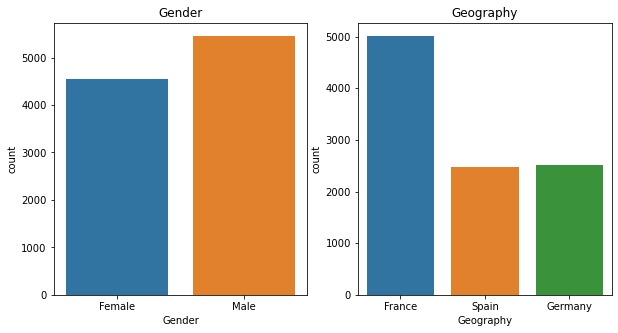

In [12]:
plt.figure(figsize = (10,5))
plt.subplot(121)
sb.countplot(data = data, x = 'Gender')
plt.title('Gender')
plt.subplot(122)
sb.countplot(data = data, x = 'Geography')
plt.title('Geography')
plt.show()

<AxesSubplot:xlabel='Age', ylabel='Count'>

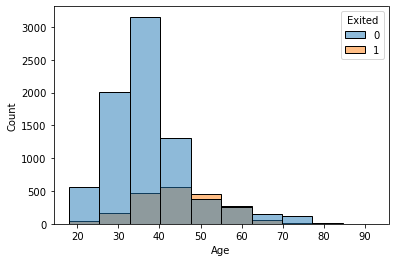

In [13]:
sb.histplot(data = data,x = 'Age', hue ='Exited', bins = 10)

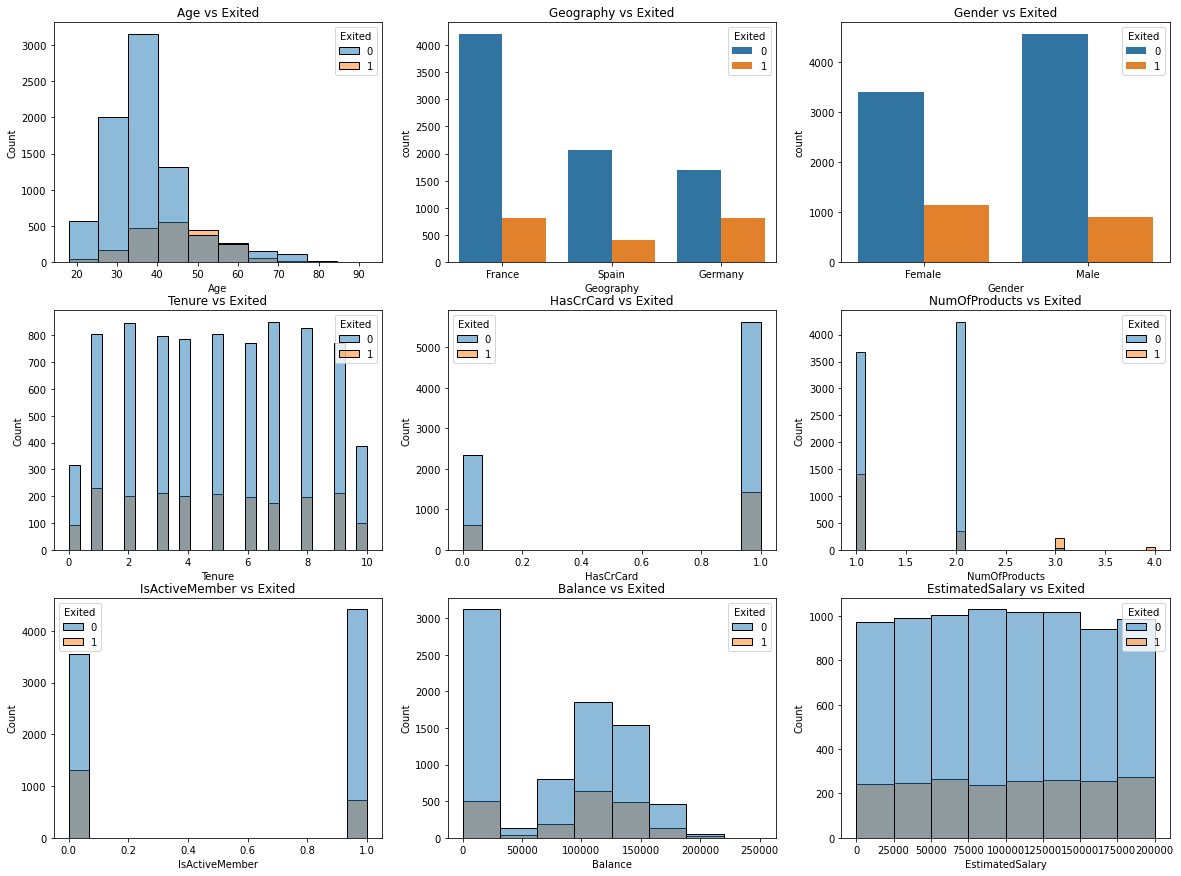

In [14]:
# Bivariate Analysis with respect to people who have exited.
plt.figure(figsize =(20,15))
plt.subplot(331)
sb.histplot(data = data,x = 'Age', hue ='Exited', bins = 10)
plt.title('Age vs Exited')

plt.subplot(332)
sb.countplot(data = data,x = 'Geography', hue='Exited')
plt.title('Geography vs Exited')

plt.subplot(333)
sb.countplot(data = data,x = 'Gender', hue='Exited')
plt.title('Gender vs Exited')

plt.subplot(334)
sb.histplot(data = data,x = 'Tenure', hue='Exited')
plt.title('Tenure vs Exited')

plt.subplot(335)
sb.histplot(data = data,x = 'HasCrCard', hue='Exited')
plt.title('HasCrCard vs Exited')

plt.subplot(336)
sb.histplot(data = data,x = 'NumOfProducts', hue='Exited')
plt.title('NumOfProducts vs Exited')

plt.subplot(337)
sb.histplot(data = data,x = 'IsActiveMember', hue='Exited')
plt.title('IsActiveMember vs Exited')

plt.subplot(338)
sb.histplot(data = data,x = 'Balance', hue='Exited', bins = 8)
plt.title('Balance vs Exited')

plt.subplot(339)
sb.histplot(data = data,x = 'EstimatedSalary', hue='Exited', bins = 8)
plt.title('EstimatedSalary vs Exited')

plt.show()

### Choosing best features and scaling

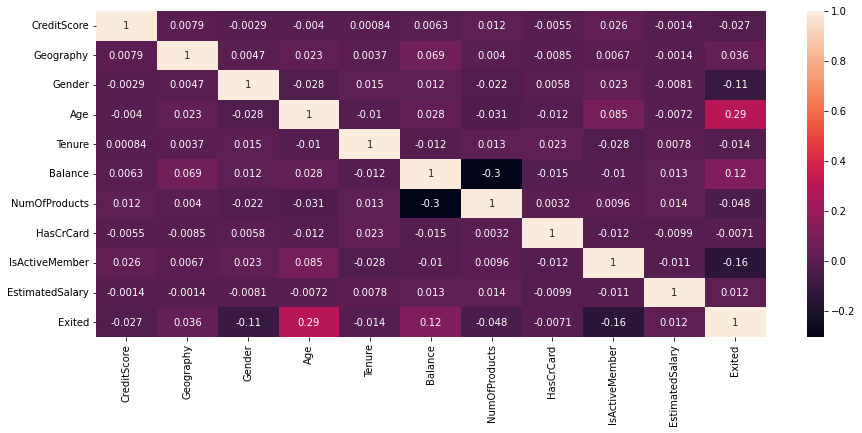

In [15]:
# Selecting features based on correlation
corr = data1.iloc[:,2:].corr()
plt.figure(figsize = (15,6))
sb.heatmap(corr, annot = True)
plt.show()

In [16]:
corr['Exited'] = corr['Exited'].apply(lambda x : x *-1 if x < 0 else x)
(corr['Exited'].sort_values(ascending = False)) * 100

Exited             100.000000
Age                 28.532304
IsActiveMember      15.612828
Balance             11.853277
Gender              10.651249
NumOfProducts        4.781986
Geography            3.594295
CreditScore          2.709354
Tenure               1.400061
EstimatedSalary      1.209686
HasCrCard            0.713777
Name: Exited, dtype: float64

In [17]:
# Taking top 5 features with high correlation with Exited
x = data1[['Age','IsActiveMember','Balance','Gender']]
y = data1['Exited']
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [18]:
# scaling Features
scaled_x = pd.DataFrame(MinMaxScaler().fit_transform(x), columns = x.columns)
scaled_x

,Age,IsActiveMember,Balance,Gender
0,0.324324,1.0,0.000000,0.0
1,0.310811,1.0,0.334031,0.0
2,0.324324,0.0,0.636357,0.0
3,0.283784,0.0,0.000000,0.0
4,0.337838,1.0,0.500246,0.0
...,...,...,...,...
9995,0.283784,0.0,0.000000,1.0
9996,0.229730,1.0,0.228657,1.0
9997,0.243243,1.0,0.000000,0.0
9998,0.324324,0.0,0.299226,1.0


In [19]:
print(scaled_x.shape, y.shape)

(10000, 4) (10000,)


### Splitting data for Train and Test

In [20]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y , test_size= 0.3, random_state= 42)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(7000, 4) (3000, 4) (7000,) (3000,)


### Model 1 - Logistic Regression

In [21]:
# Training the model
LR_model = LogisticRegression().fit(x_train, y_train)

# Predicting
LR_y_predict = LR_model.predict(x_test)

# Performance metrics
LR_Accuracy  =  accuracy_score(y_test, LR_y_predict)
LR_Precision =  precision_score(y_test, LR_y_predict)
LR_recall    =  recall_score(y_test, LR_y_predict)
LR_f1        =  f1_score(y_test, LR_y_predict)
LR_AUC       =  roc_auc_score(y_test, LR_y_predict)
# Confusion Matrix
print(confusion_matrix(y_test, LR_y_predict))

[[2354   62]
 [ 496   88]]


### Model 2 - Decision Tree Classifier

In [22]:
# Checking max_depth with cross validation

max_depth = np.arange(1,10)
kf = RepeatedStratifiedKFold(n_splits = 20, random_state = None)
for val in max_depth:
    score = cross_val_score(DecisionTreeClassifier(max_depth = val, random_state = 42), scaled_x, y, cv = kf, scoring="f1")
    print("\nmax depth:",val)
    print("F1 score :",round(score.mean(),3))


max depth: 1
F1 score : 0.0

max depth: 2
F1 score : 0.465

max depth: 3
F1 score : 0.292

max depth: 4
F1 score : 0.44

max depth: 5
F1 score : 0.413

max depth: 6
F1 score : 0.435

max depth: 7
F1 score : 0.416

max depth: 8
F1 score : 0.417

max depth: 9
F1 score : 0.423


##### F1 score is higher at max depth = 6.

In [23]:
# Training the model
DTC_model = DecisionTreeClassifier(max_depth = 6).fit(x_train, y_train)

# Predicting
DTC_y_predict = DTC_model.predict(x_test)

# Performance metrics
DTC_Accuracy  =  accuracy_score(y_test, DTC_y_predict)
DTC_Precision =  precision_score(y_test, DTC_y_predict)
DTC_recall    =  recall_score(y_test, DTC_y_predict)
DTC_f1        =  f1_score(y_test, DTC_y_predict)
DTC_AUC       =  roc_auc_score(y_test, DTC_y_predict)

# Confusion Matrix
print(confusion_matrix(y_test, DTC_y_predict))

[[2357   59]
 [ 445  139]]


### Model 3 - Bagging with Random ForestRandom Forest Classifer

In [24]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)
params = {
 'max_depth': [2,3,5,10,20],
 'min_samples_leaf': [5,10,20,50,100,200],
 'n_estimators': [10,25,30,50,100,200]
}
grid_search = GridSearchCV(estimator = rf,
                           param_grid = params,
                           cv = 4,
                           n_jobs = -1, verbose = 3, scoring="f1")
grid_search.fit(x_train,y_train)
grid_search.best_estimator_

Fitting 4 folds for each of 180 candidates, totalling 720 fits


RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [39]:
# Training the model
RFC_model = RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200,n_jobs=-1, random_state=42)
RFC_model.fit(x_train, y_train)

# Predicting
RFC_y_predict = RFC_model.predict(x_test)

# Performance metrics
RFC_Accuracy  =  accuracy_score(y_test, RFC_y_predict)
RFC_Precision =  precision_score(y_test, RFC_y_predict)
RFC_recall    =  recall_score(y_test, RFC_y_predict)
RFC_f1        =  f1_score(y_test, RFC_y_predict)
RFC_AUC       =  roc_auc_score(y_test, RFC_y_predict)


# Confusion Matrix
print(confusion_matrix(y_test, RFC_y_predict))

[[2322   94]
 [ 395  189]]


### Model 4 - AdaBoost Classifier

In [26]:
# define the model
AB_model = AdaBoostClassifier().fit(x_train, y_train)

# Predicting
AB_y_predict = AB_model.predict(x_test)

# Performance metrics
AB_Accuracy  =  accuracy_score(y_test, AB_y_predict)
AB_Precision =  precision_score(y_test, AB_y_predict)
AB_recall    =  recall_score(y_test, AB_y_predict)
AB_f1        =  f1_score(y_test, AB_y_predict)
AB_AUC       =  roc_auc_score(y_test, AB_y_predict)

# Confusion Matrix
print(confusion_matrix(y_test, AB_y_predict))

[[2315  101]
 [ 374  210]]


### Model 5 - Stacking Classifers

In [27]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('lr', LogisticRegression()))
    level0.append(('knn', KNeighborsClassifier()))
    level0.append(('cart', DecisionTreeClassifier()))
    level0.append(('bayes', GaussianNB()))
    # define meta learner model
    level1 = LogisticRegression()
    # define the stacking ensemble
    model = StackingClassifier(estimators=level0, final_estimator=level1, cv=5) # for 5 folds
    return model

In [28]:
# define the model
stack_model = get_stacking()
stack_model.fit(x_train, y_train)

# Predicting
stack_y_predict = stack_model.predict(x_test)

# Performance metrics
stack_Accuracy  =  accuracy_score(y_test, stack_y_predict)
stack_Precision =  precision_score(y_test, stack_y_predict)
stack_recall    =  recall_score(y_test, stack_y_predict)
stack_f1        =  f1_score(y_test, stack_y_predict)
stack_AUC       =  roc_auc_score(y_test, stack_y_predict)

# Confusion Matrix
print(confusion_matrix(y_test, stack_y_predict))

[[2363   53]
 [ 427  157]]


### Cross validation for all models

In [45]:
# 1. Logisitic Regression
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits = 10, n_repeats = 3, random_state=1)
accuracy_LR = cross_val_score(LR_model, scaled_x, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise').mean()
recall_LR = cross_val_score(LR_model, scaled_x, y, scoring = 'recall', cv = cv, n_jobs = -1, error_score = 'raise').mean()
f1_LR = cross_val_score(LR_model, scaled_x, y, scoring = 'f1', cv = cv, n_jobs = -1, error_score = 'raise').mean()
precision_LR = cross_val_score(LR_model, scaled_x, y, scoring = 'precision', cv = cv, n_jobs = -1, error_score = 'raise').mean()
roc_auc_LR = cross_val_score(LR_model, scaled_x, y, scoring = 'roc_auc', cv = cv, n_jobs = -1, error_score = 'raise').mean()

In [43]:
# 2. Decision Tree Classifier
# evaluate the model
accuracy_DTC = cross_val_score(DTC_model, scaled_x, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise').mean()
recall_DTC = cross_val_score(DTC_model, scaled_x, y, scoring = 'recall', cv = cv, n_jobs = -1, error_score = 'raise').mean()
f1_DTC = cross_val_score(DTC_model, scaled_x, y, scoring = 'f1', cv = cv, n_jobs = -1, error_score = 'raise').mean()
precision_DTC = cross_val_score(DTC_model, scaled_x, y, scoring = 'precision', cv = cv, n_jobs = -1, error_score = 'raise').mean()
roc_auc_DTC = cross_val_score(DTC_model, scaled_x, y, scoring = 'roc_auc', cv = cv, n_jobs = -1, error_score = 'raise').mean()

In [44]:
# 3. Random Forest Classifier
# evaluate the model
accuracy_RFC = cross_val_score(RFC_model, scaled_x, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise').mean()
recall_RFC = cross_val_score(RFC_model, scaled_x, y, scoring = 'recall', cv = cv, n_jobs = -1, error_score = 'raise').mean()
f1_RFC = cross_val_score(RFC_model, scaled_x, y, scoring = 'f1', cv = cv, n_jobs = -1, error_score = 'raise').mean()
precision_DTC = cross_val_score(RFC_model, scaled_x, y, scoring = 'precision', cv = cv, n_jobs = -1, error_score = 'raise').mean()
roc_auc_DTC = cross_val_score(RFC_model, scaled_x, y, scoring = 'roc_auc', cv = cv, n_jobs = -1, error_score = 'raise').mean()


In [46]:
# 4. AdaBoost Classifier
# evaluate the model
accuracy_AB = cross_val_score(AB_model, scaled_x, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise').mean()
recall_AB = cross_val_score(AB_model, scaled_x, y, scoring = 'recall', cv = cv, n_jobs = -1, error_score = 'raise').mean()
f1_AB = cross_val_score(AB_model, scaled_x, y, scoring = 'f1', cv = cv, n_jobs = -1, error_score = 'raise').mean()
precision_AB = cross_val_score(AB_model, scaled_x, y, scoring = 'precision', cv = cv, n_jobs = -1, error_score = 'raise').mean()
roc_auc_AB = cross_val_score(AB_model, scaled_x, y, scoring = 'roc_auc', cv = cv, n_jobs = -1, error_score = 'raise').mean()


In [47]:
# 5. Stacking Classifier
# evaluate the model
accuracy_stack = cross_val_score(stack_model, scaled_x, y, scoring = 'accuracy', cv = cv, n_jobs = -1, error_score = 'raise').mean()
recall_stack = cross_val_score(stack_model, scaled_x, y, scoring = 'recall', cv = cv, n_jobs = -1, error_score = 'raise').mean()
f1_stack = cross_val_score(stack_model, scaled_x, y, scoring = 'f1', cv = cv, n_jobs = -1, error_score = 'raise').mean()
precision_stack = cross_val_score(stack_model, scaled_x, y, scoring = 'precision', cv = cv, n_jobs = -1, error_score = 'raise').mean()
roc_auc_stack = cross_val_score(stack_model, scaled_x, y, scoring = 'roc_auc', cv = cv, n_jobs = -1, error_score = 'raise').mean()


##### Random Forest has high mean value, Thus it can be used for prediction.

In [40]:
# Dataframe of all scores for all models.
df = pd.DataFrame()
df['Model'] = ['Logistic', 'Decision Tree', 'Random Forest', 'Adaboost', 'Stacking']
df['Accuracy_score'] = [LR_Accuracy, DTC_Accuracy, RFC_Accuracy, AB_Accuracy, stack_Accuracy]
df['Precision_score'] = [LR_Precision, DTC_Precision, RFC_Precision, AB_Precision, stack_Precision]
df['Recall_score'] = [LR_recall, DTC_recall, RFC_recall, AB_recall, stack_recall]
df['F1_score'] = [LR_f1, DTC_f1, RFC_f1, AB_f1, stack_f1]
df['AUC score'] = [LR_AUC, DTC_AUC, RFC_AUC, AB_AUC, stack_AUC]
df['Train Accuracy'] = [LR_model.score(x_train,y_train),DTC_model.score(x_train,y_train),RFC_model.score(x_train,y_train),AB_model.score(x_train,y_train),stack_model.score(x_train,y_train)]
df['Test Accuracy']  = [LR_model.score(x_test,y_test),DTC_model.score(x_test,y_test),RFC_model.score(x_test,y_test),AB_model.score(x_test,y_test),stack_model.score(x_test,y_test)] 
df = df.round(3)
df

,Model,Accuracy_score,Precision_score,Recall_score,F1_score,AUC score,Train Accuracy,Test Accuracy
0,Logistic,0.814,0.587,0.151,0.240,0.563,0.803,0.814
1,Decision Tree,0.832,0.702,0.238,0.355,0.607,0.836,0.832
2,Random Forest,0.837,0.668,0.324,0.436,0.642,0.851,0.837
3,Adaboost,0.842,0.675,0.360,0.469,0.659,0.830,0.842
4,Stacking,0.840,0.748,0.269,0.395,0.623,0.838,0.840


In [ ]:
# After cross validation of all models:
df1 = pd.DataFrame()
df1['Model'] = ['Logistic', 'Decision Tree', 'Random Forest', 'Adaboost', 'Stacking']
df1['Accuracy_score'] = [accuracy_LR, accuracy_DTC, accuracy_RFC, accuracy_AB, accuracy_stack]
df1['Precision_score'] = [precision_LR, precision_DTC, precision_RFC, precision_AB, precision_stack]
df1['Recall_score'] = [recall_LR, recall_DTC, recall_RFC, recall_AB, recall_stack]
df1['F1_score'] = [f1_LR, f1_DTC, f1_RFC, f1_AB, f1_stack]
df1['AUC score'] = [roc_auc_LR, roc_auc_DTC, roc_auc_RFC, roc_auc_AB, roc_auc_stack] 
df1 = df1.round(3)
df1

##### Random Forest has high scores across many performance metrics

### Finding no. of failures for all Classifiers

In [36]:
LR_y_predict = pd.DataFrame(LR_y_predict)
DTC_y_predict = pd.DataFrame(DTC_y_predict)
RFC_y_predict = pd.DataFrame(RFC_y_predict)
AB_y_predict = pd.DataFrame(AB_y_predict)
stack_y_predict = pd.DataFrame(stack_y_predict)
Predict_data = pd.DataFrame()
Predict_data['LR_y_predict'] = LR_y_predict
Predict_data['DTC_y_predict'] = DTC_y_predict
Predict_data['RFC_y_predict'] = RFC_y_predict
Predict_data['AB_y_predict'] = AB_y_predict
Predict_data['stack_y_predict'] = stack_y_predict
Predict_data['y_test'] = y_test.values

In [37]:
print('Logisitc Regression - Total wrong predictions :',Predict_data.loc[Predict_data['LR_y_predict'] != Predict_data['y_test']].shape[0])
print('Decision Tree Classifer - Total wrong predictions :',Predict_data.loc[Predict_data['DTC_y_predict'] != Predict_data['y_test']].shape[0])
print('Random Forest Classifer - Total wrong predictions :',Predict_data.loc[Predict_data['RFC_y_predict'] != Predict_data['y_test']].shape[0])
print('AdaBoost Classifer - Total wrong predictions :',Predict_data.loc[Predict_data['AB_y_predict'] != Predict_data['y_test']].shape[0])
print('Stacking Classifer - Total wrong predictions :',Predict_data.loc[Predict_data['stack_y_predict'] != Predict_data['y_test']].shape[0])

Logisitc Regression - Total wrong predictions : 558
Decision Tree Classifer - Total wrong predictions : 504
Random Forest Classifer - Total wrong predictions : 492
AdaBoost Classifer - Total wrong predictions : 475
Stacking Classifer - Total wrong predictions : 480


### ROC_AUC_Curve

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.761
DecisionTree: ROC AUC=0.768
RandomForest: ROC AUC=0.777
AdaBoost:ROC AUC=0.795
Stacking: ROC AUC=0.770


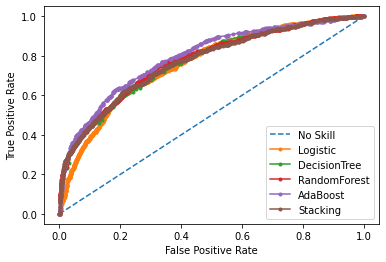

In [38]:
# ROC_AUC_curve
from sklearn.metrics import roc_curve
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
LR_probs = LR_model.predict_proba(x_test)
DTC_probs = DTC_model.predict_proba(x_test)
RFC_probs = RFC_model.predict_proba(x_test)
AB_probs = AB_model.predict_proba(x_test)
stack_probs = stack_model.predict_proba(x_test)
# keep probabilities for the positive outcome only
LR_probs = LR_probs[:, 1]
DTC_probs = DTC_probs[:, 1]
RFC_probs = RFC_probs[:, 1]
AB_probs = AB_probs[:, 1]
stack_probs = stack_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
LR_auc = roc_auc_score(y_test, LR_probs)
DTC_auc = roc_auc_score(y_test, DTC_probs)
RFC_auc = roc_auc_score(y_test, RFC_probs)
AB_auc = roc_auc_score(y_test, AB_probs)
stack_auc = roc_auc_score(y_test, stack_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (LR_auc))
print('DecisionTree: ROC AUC=%.3f' % (DTC_auc))
print('RandomForest: ROC AUC=%.3f' % (RFC_auc))
print('AdaBoost:ROC AUC=%.3f' % (AB_auc))
print('Stacking: ROC AUC=%.3f' % (stack_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
LR_fpr, LR_tpr, _ = roc_curve(y_test, LR_probs)
DTC_fpr, DTC_tpr, _ = roc_curve(y_test, DTC_probs)
RFC_fpr, RFC_tpr, _ = roc_curve(y_test, RFC_probs)
AB_fpr, AB_tpr, _ = roc_curve(y_test, AB_probs)
stack_fpr, stack_tpr, _ = roc_curve(y_test, stack_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(LR_fpr, LR_tpr, marker='.', label='Logistic')
plt.plot(DTC_fpr, DTC_tpr, marker='.', label='DecisionTree')
plt.plot(RFC_fpr, RFC_tpr, marker='.', label='RandomForest')
plt.plot(AB_fpr, AB_tpr, marker='.', label='AdaBoost')
plt.plot(stack_fpr, stack_tpr, marker='.', label='Stacking')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Conclusion:

#### We can cleary see that Adaboostclassifer is better for this data, based on cross-validation, different metric scores, total wrong predictions and also ROC-AUC score is pretty high.